In [12]:
import numpy as np  # For numerical operations
import pandas as pd  # For handling data in DataFrame format
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA  # LDA Library


In [13]:
# LDA Using Scikit-Learn

In [14]:
# Creating a small dataset (2 features, 2 classes)
np.random.seed(42)  # For reproducibility

# Class 0: Mean (2, 3), Class 1: Mean (7, 8)
class_0 = np.random.multivariate_normal(mean=[2, 3], cov=[[1, 0.5], [0.5, 1]], size=10)
class_1 = np.random.multivariate_normal(mean=[7, 8], cov=[[1, 0.5], [0.5, 1]], size=10)

# Stacking the data
X = np.vstack((class_0, class_1))  # Feature matrix
y = np.array([0] * 10 + [1] * 10)  # Labels (0 and 1)

# Converting to DataFrame for better visualization
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Class'] = y
df.head()


,Feature 1,Feature 2,Class
0,1.638965,2.500701,0
1,0.677570,3.200600,0
2,2.319851,3.085714,0
3,0.248644,2.016079,0
4,2.135297,3.677857,0


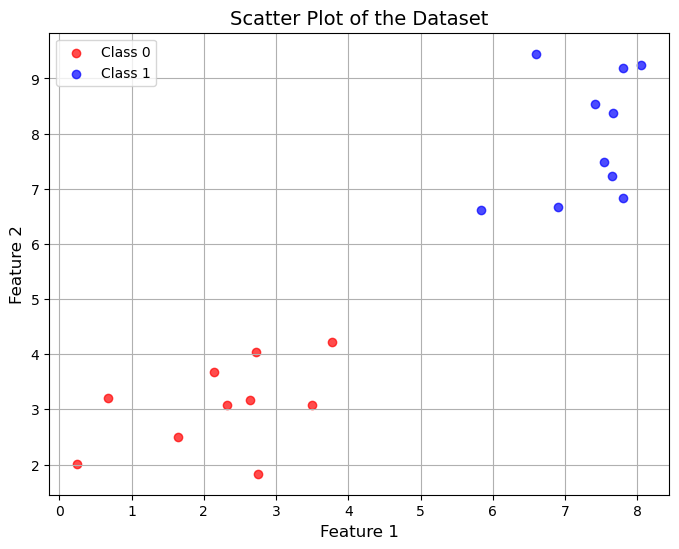

In [15]:
# Scatter plot of the dataset
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']

for label, color in zip([0, 1], colors):
    plt.scatter(df[df['Class'] == label]['Feature 1'],
                df[df['Class'] == label]['Feature 2'],
                c=color, label=f'Class {label}', alpha=0.7)

plt.title('Scatter Plot of the Dataset', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Creating and fitting LDA model
lda = LDA(n_components=1)  # Reduce to 1D
X_lda = lda.fit_transform(X, y)

# Display transformed dataset
print("Transformed Data (LDA Projection):")
print(X_lda[:5])  # Show first 5 transformed samples


Transformed Data (LDA Projection):
[[-3.92451389]
 [-4.21147458]
 [-3.11357402]
 [-5.18118088]
 [-2.91123564]]


In [17]:
# Computing LDA Manually

In [18]:
# Compute mean vectors for each class
mean_0 = np.mean(class_0, axis=0)
mean_1 = np.mean(class_1, axis=0)

print("Mean of Class 0:", mean_0)
print("Mean of Class 1:", mean_1)


Mean of Class 0: [2.23891226 3.08103921]
Mean of Class 1: [7.32727776 7.96280947]


In [19]:
# Compute within-class scatter matrix Sw
S_W = np.zeros((2, 2))

# Class 0 contribution
for x in class_0:
    diff = (x - mean_0).reshape(2, 1)
    S_W += diff @ diff.T

# Class 1 contribution
for x in class_1:
    diff = (x - mean_1).reshape(2, 1)
    S_W += diff @ diff.T

print("Within-Class Scatter Matrix (S_W):")
print(S_W)


Within-Class Scatter Matrix (S_W):
[[15.52915522  6.11405239]
 [ 6.11405239 16.92391747]]


In [20]:
# Compute overall mean
mean_overall = np.mean(X, axis=0)

# Compute between-class scatter matrix Sb
S_B = np.zeros((2, 2))
diff = (mean_1 - mean_0).reshape(2, 1)
S_B = len(class_0) * (diff @ diff.T)

print("Between-Class Scatter Matrix (S_B):")
print(S_B)


Between-Class Scatter Matrix (S_B):
[[258.91463422 248.40231338]
 [248.40231338 238.31680847]]


In [21]:
# Compute the eigenvectors and eigenvalues
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W) @ S_B)

print("Eigenvalues:", eig_vals)
print("Eigenvectors:")
print(eig_vecs)


Eigenvalues: [2.23801758e+01 5.32907052e-15]
Eigenvectors:
[[ 0.78300187 -0.69230592]
 [ 0.62201935  0.72160413]]


In [22]:
# Select the eigenvector corresponding to the largest eigenvalue
lda_direction = eig_vecs[:, np.argmax(eig_vals)]

print("Chosen LDA Direction (Eigenvector corresponding to largest Eigenvalue):")
print(lda_direction)


Chosen LDA Direction (Eigenvector corresponding to largest Eigenvalue):
[0.78300187 0.62201935]


In [23]:
# Project the data onto the LDA vector
X_manual_lda = X @ lda_direction

# Display transformed dataset (manual method)
print("Manually Transformed Data (LDA Projection):")
print(X_manual_lda[:5])  # Show first 5 transformed samples


Manually Transformed Data (LDA Projection):
[2.83879698 2.52137409 3.73582186 1.448729   3.95963939]


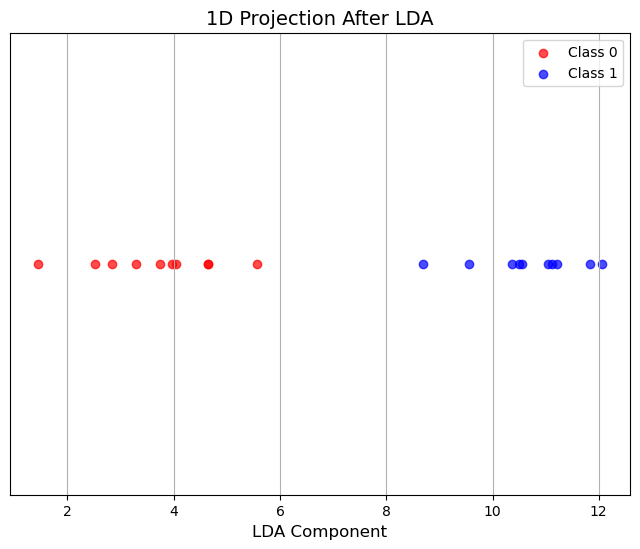

In [24]:
plt.figure(figsize=(8, 6))

# Scatter plot of projected points
plt.scatter(X_manual_lda[:10], np.zeros(10), c='red', label="Class 0", alpha=0.7)
plt.scatter(X_manual_lda[10:], np.zeros(10), c='blue', label="Class 1", alpha=0.7)

plt.title('1D Projection After LDA', fontsize=14)
plt.xlabel('LDA Component', fontsize=12)
plt.yticks([])  # Remove Y-axis as it's 1D projection
plt.legend()
plt.grid(True)
plt.show()
